In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2
from sklearn.preprocessing import StandardScaler

# fwhm-5 cluster-50 state-150

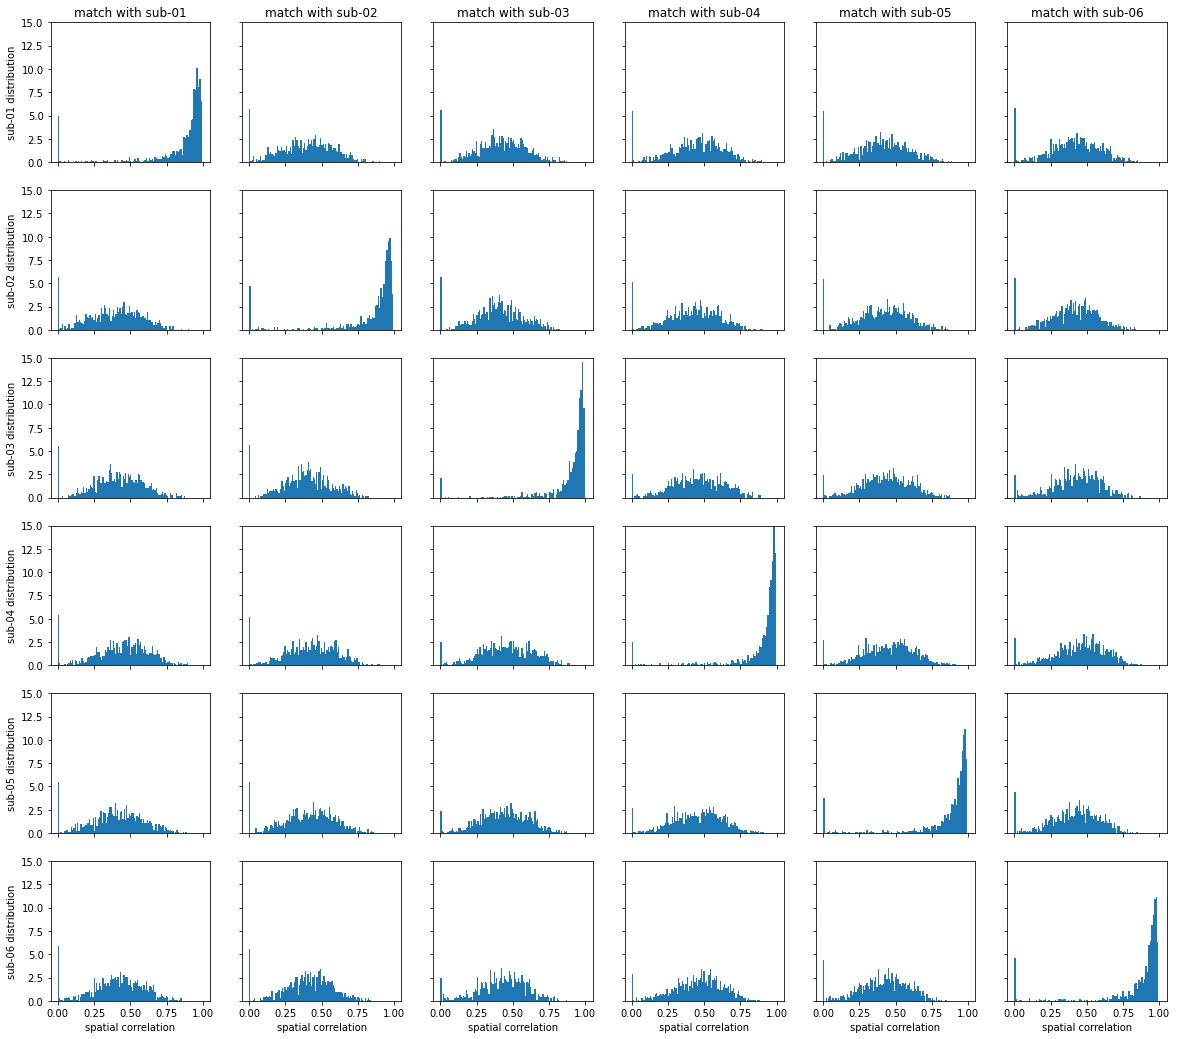

In [20]:
width_fig = 20
n_comp=6
fig = plt.figure(figsize=(width_fig, n_comp*3))
R = np.load('/data/cisl/pbellec/cneuromod_embeddings/xp_202012/friends-s01_reproducibility/Rmatch_fwhm-5_cluster-300_state-900.npy')
for sub1 in range(6):
    for sub2 in range(6):
        plt.subplot(6, 6, 1 + sub1 + sub2 * 6)
        match_val = np.max(R[:, :, sub1, sub2], axis=1)
        plt.hist(match_val, bins=100, density=True, stacked=True)
        plt.axis((-0.05, 1.05, 0, 15))
        ax = plt.gca()
        if sub2 == 0:
            ax.set_title(f'match with sub-0{sub1+1}')
        if sub1 != 0:
            ax.tick_params(labelleft=False)
        else: 
            ax.set_ylabel(f'sub-0{sub2+1} distribution')
        if sub2 != 5:
            ax.tick_params(labelbottom=False) 
        else:
            ax.set_xlabel('spatial correlation')